In [1]:
import pandas as pd 

path='WA_Fn-UseC_-HR-Employee-Attrition.csv'
dataset=pd.read_csv(path)
pd.options.display.max_columns = 500
dataset





,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [2]:
#binary encoding of values Attrition Gender Over18 overtime 
dataset['Attrition']=dataset['Attrition'].apply(lambda x: 1 if x=='Yes' else 0)
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x == 'Male' else 0)
dataset['OverTime'] = dataset['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
pd.options.display.max_rows = 500
dataset


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,1,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,1,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,1,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,1,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8


In [3]:
# Define categorical columns and their prefixes
encoding_map = {
    'BusinessTravel': 'Travel',
    'Department': 'Department',
    'EducationField': 'Education',
    'JobRole': 'Role',
    'MaritalStatus': 'Status'
}

# Apply one-hot encoding dynamically
for col, prefix in encoding_map.items():
    dataset = dataset.join(pd.get_dummies(dataset[col], prefix=prefix)).drop(col, axis=1)

# Display processed dataset
pd.options.display.max_columns = 500
dataset

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Non-Travel,Travel_Travel_Frequently,Travel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,False,False,True,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,True
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,False,False,True,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3,False,True,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7,False,False,True,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,False
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3,False,False,True,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False


In [4]:
dataset = dataset.map(lambda x: 1 if x is True else 0 if x is False else x)
pd.options.display.max_columns = 500

dataset








,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Non-Travel,Travel_Travel_Frequently,Travel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,Y,1,11,3,1,80,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,Y,0,23,4,4,80,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,Y,1,15,3,2,80,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,Y,1,11,3,3,80,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,Y,0,12,3,4,80,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,1,2061,3,1,41,4,2,4,2571,12290,4,Y,0,17,3,3,80,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,1,2062,4,1,42,2,3,1,9991,21457,4,Y,0,15,3,1,80,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,1,2064,2,1,87,4,2,2,6142,5174,1,Y,1,20,4,2,80,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,1,2065,4,1,63,2,2,2,5390,13243,2,Y,0,14,3,4,80,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [5]:


#dropping unessesory columns 
dataset.drop(["EmployeeNumber", "Over18", "StandardHours", "EmployeeCount"], axis=1, inplace=True)

pd.options.display.max_columns = 500


dataset





,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Travel_Non-Travel,Travel_Travel_Frequently,Travel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_Human Resources,Education_Life Sciences,Education_Marketing,Education_Medical,Education_Other,Education_Technical Degree,Role_Healthcare Representative,Role_Human Resources,Role_Laboratory Technician,Role_Manager,Role_Manufacturing Director,Role_Research Director,Role_Research Scientist,Role_Sales Executive,Role_Sales Representative,Status_Divorced,Status_Married,Status_Single
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,2,3,1,41,4,2,4,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1466,39,0,613,6,1,4,1,42,2,3,1,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1467,27,0,155,4,3,2,1,87,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1468,49,0,1023,2,3,4,1,63,2,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0



==== 📊 Model Performance Metrics ====
✅ Accuracy: 0.8435
✅ ROC-AUC Score: 0.7704
✅ Log Loss: 0.3756
✅ Cohen's Kappa Score: 0.1113
✅ R² Score (on Probabilities): 0.1442

==== 📄 Classification Report ====
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.57      0.09      0.15        47

    accuracy                           0.84       294
   macro avg       0.71      0.54      0.53       294
weighted avg       0.81      0.84      0.79       294


✅ Model saved successfully!

==== 🔥 Feature Importance (Top 10) ====
                 Feature  Importance
10         MonthlyIncome    0.072520
0                    Age    0.068437
18     TotalWorkingYears    0.054460
1              DailyRate    0.049831
6             HourlyRate    0.048613
11           MonthlyRate    0.046555
2       DistanceFromHome    0.045405
13              OverTime    0.040045
24  YearsWithCurrManager    0.038292
21        YearsAtCompany    0

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


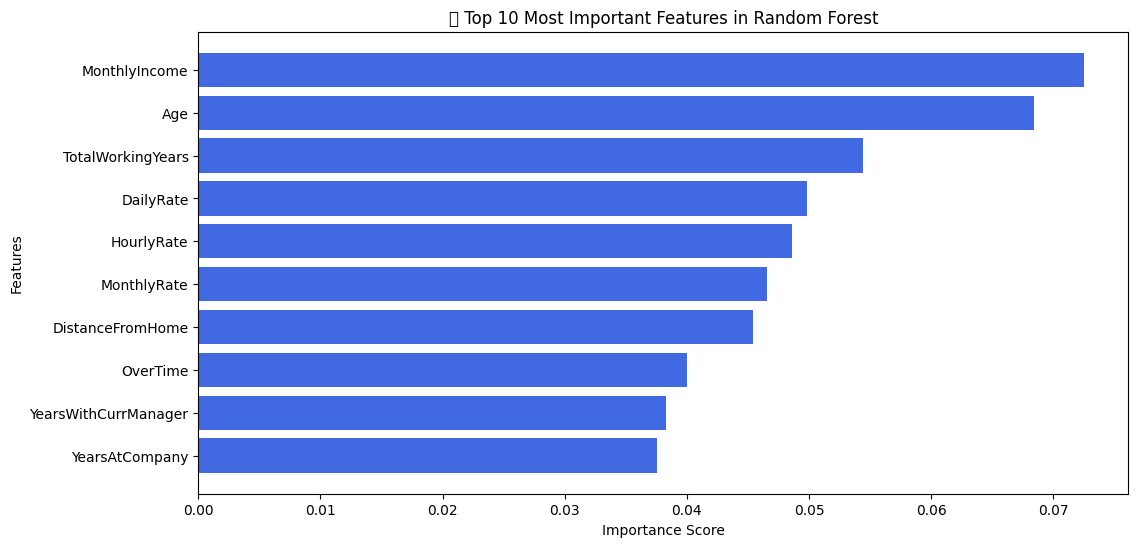

In [6]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             roc_auc_score, log_loss, cohen_kappa_score, 
                             r2_score)
from sklearn.model_selection import train_test_split

# Load dataset
X = dataset.drop("Attrition", axis=1)
y = dataset["Attrition"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train RandomForest Model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict labels & probabilities
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
kappa = cohen_kappa_score(y_test, y_pred)
r2 = r2_score(y_test, y_prob)

# Print Model Performance
print("\n==== 📊 Model Performance Metrics ====")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print(f"✅ Log Loss: {logloss:.4f}")
print(f"✅ Cohen's Kappa Score: {kappa:.4f}")
print(f"✅ R² Score (on Probabilities): {r2:.4f}")

print("\n==== 📄 Classification Report ====")
print(classification_report(y_test, y_pred))

# Save Model
joblib.dump(model, "attrition_model_basic.pkl")
print("\n✅ Model saved successfully!")

# 🔹 Feature Importance Calculation
feature_importance = model.feature_importances_
feature_names = X.columns

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the feature importance
print("\n==== 🔥 Feature Importance (Top 10) ====")
print(importance_df.head(10))

# 🔹 Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("🔹 Top 10 Most Important Features in Random Forest")
plt.gca().invert_yaxis()  # Highest at top
plt.show()





==== 📊 Model Performance Metrics ====
✅ Accuracy: 0.8027
✅ ROC-AUC Score: 0.7801
✅ Log Loss: 0.4227
✅ Cohen's Kappa Score: 0.4000
✅ R² Score (on Probabilities): 0.1442

==== 📄 Classification Report ====
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       247
           1       0.42      0.66      0.52        47

    accuracy                           0.80       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.85      0.80      0.82       294


==== 🔥 Feature Importance (Top 10) ====
                 Feature  Importance
10         MonthlyIncome    0.078343
0                    Age    0.065817
18     TotalWorkingYears    0.058422
21        YearsAtCompany    0.053113
13              OverTime    0.052789
1              DailyRate    0.048934
24  YearsWithCurrManager    0.048124
2       DistanceFromHome    0.043460
17      StockOptionLevel    0.041040
11           MonthlyRate    0.040558


C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


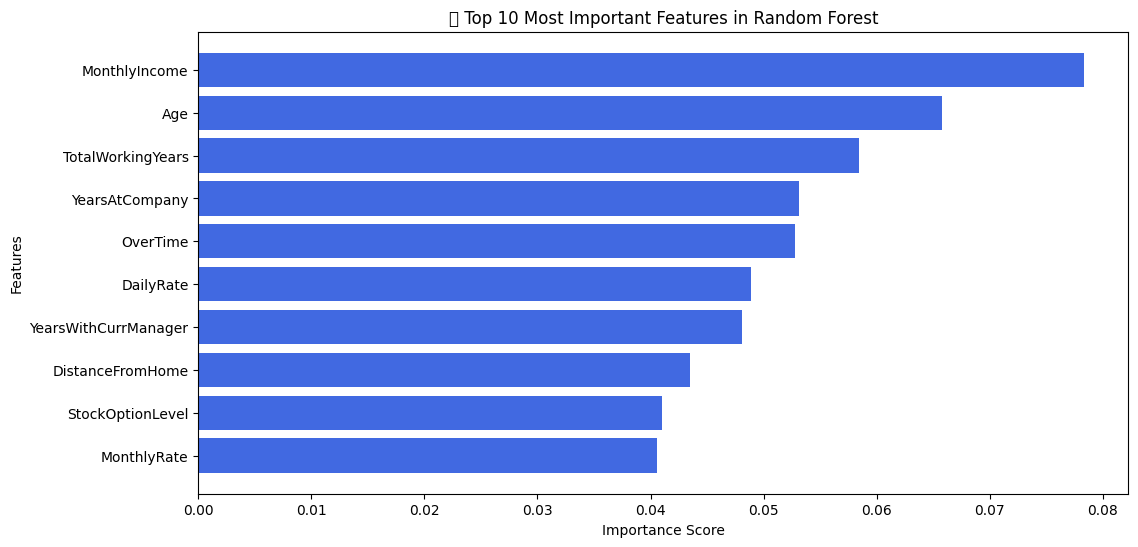


✅ Model saved successfully!


In [7]:
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, classification_report, 
                             roc_auc_score, log_loss, cohen_kappa_score, 
                             r2_score, precision_recall_curve)
from sklearn.model_selection import train_test_split

# Load dataset
X = dataset.drop("Attrition", axis=1)
y = dataset["Attrition"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply Controlled SMOTE (Optional - Use if recall is still low)
smote = SMOTE(sampling_strategy=0.2, random_state=42)  # Only add 30% extra minority class samples
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a Fine-Tuned Random Forest Model
model = RandomForestClassifier(
    n_estimators=1000,        # More trees for stability
    max_depth=12,            # Prevents overfitting
    min_samples_split=10,    # Stops too many small splits
    min_samples_leaf=5,      # Ensures larger leaves
    max_features="sqrt",     # Reduces correlation between trees
    class_weight="balanced_subsample",  # Boost minority class
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

# Predict probabilities
y_prob = model.predict_proba(X_test)[:, 1]

# Find the best threshold (Instead of 0.5)
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
best_threshold = thresholds[np.argmax(2 * (precision * recall) / (precision + recall))]  # Max F1-score

# Predict using the adjusted threshold
y_pred = (y_prob >= best_threshold).astype(int)

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
logloss = log_loss(y_test, y_prob)
kappa = cohen_kappa_score(y_test, y_pred)

# Print Performance
print("\n==== 📊 Model Performance Metrics ====")
print(f"✅ Accuracy: {accuracy:.4f}")
print(f"✅ ROC-AUC Score: {roc_auc:.4f}")
print(f"✅ Log Loss: {logloss:.4f}")
print(f"✅ Cohen's Kappa Score: {kappa:.4f}")
print(f"✅ R² Score (on Probabilities): {r2:.4f}")

print("\n==== 📄 Classification Report ====")
print(classification_report(y_test, y_pred))
feature_importance = model.feature_importances_
feature_names = X.columns

# Convert to DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Print the feature importance
print("\n==== 🔥 Feature Importance (Top 10) ====")
print(importance_df.head(10))

# 🔹 Plot Feature Importance
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'][:10], importance_df['Importance'][:10], color='royalblue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("🔹 Top 10 Most Important Features in Random Forest")
plt.gca().invert_yaxis()  # Highest at top
plt.show()




# Save Model
joblib.dump(model, "attrition_model_oversampled.pkl")
print("\n✅ Model saved successfully!")

C:\Users\HP\AppData\Local\Temp\ipykernel_740\1267158202.py:36: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


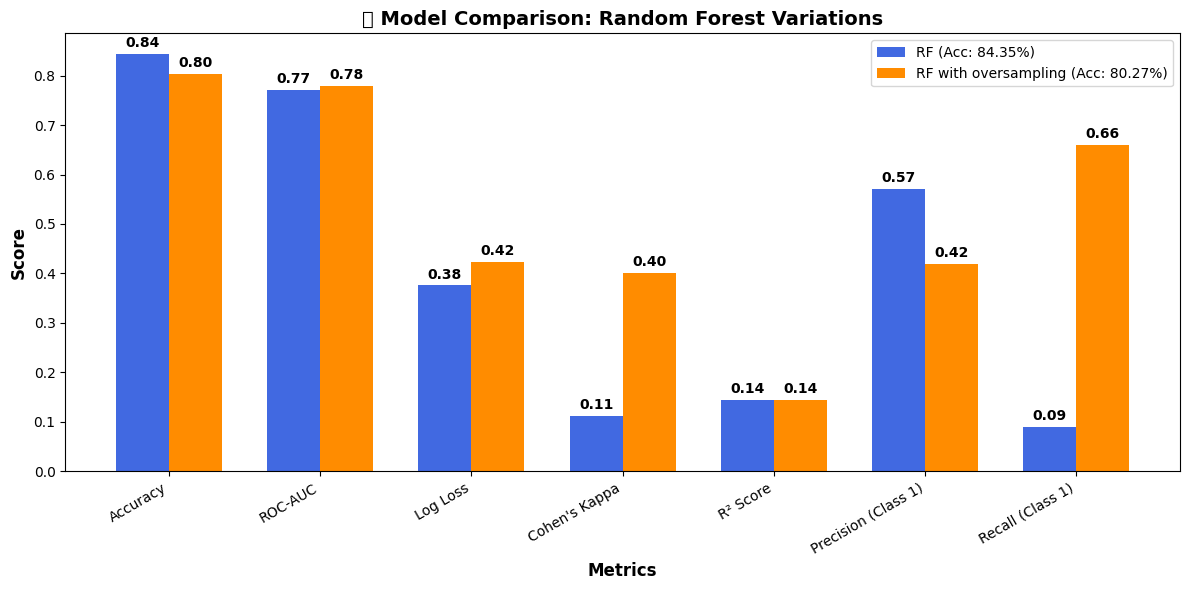

In [8]:

import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ["Accuracy", "ROC-AUC", "Log Loss", "Cohen's Kappa", "R² Score", "Precision (Class 1)", "Recall (Class 1)"]

# Model 1 (Accuracy = 84.35%)
model1_values = [0.8435, 0.7704, 0.3756, 0.1113, 0.1442, 0.57, 0.09]  

# Model 2 (Accuracy = 80.27%)
model2_values = [0.8027, 0.7801, 0.4227, 0.4000, 0.1442, 0.42, 0.66]  

x = np.arange(len(metrics))  # X-axis locations
width = 0.35  # Width of bars

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, model1_values, width, label="RF (Acc: 84.35%)", color='royalblue')
bars2 = ax.bar(x + width/2, model2_values, width, label="RF with oversampling (Acc: 80.27%)", color='darkorange')

# Labels and title
ax.set_xlabel("Metrics", fontsize=12, fontweight='bold')
ax.set_ylabel("Score", fontsize=12, fontweight='bold')
ax.set_title("📊 Model Comparison: Random Forest Variations", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=30, ha="right", fontsize=10)
ax.legend()

# Display values on top of bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5), textcoords="offset points", ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

